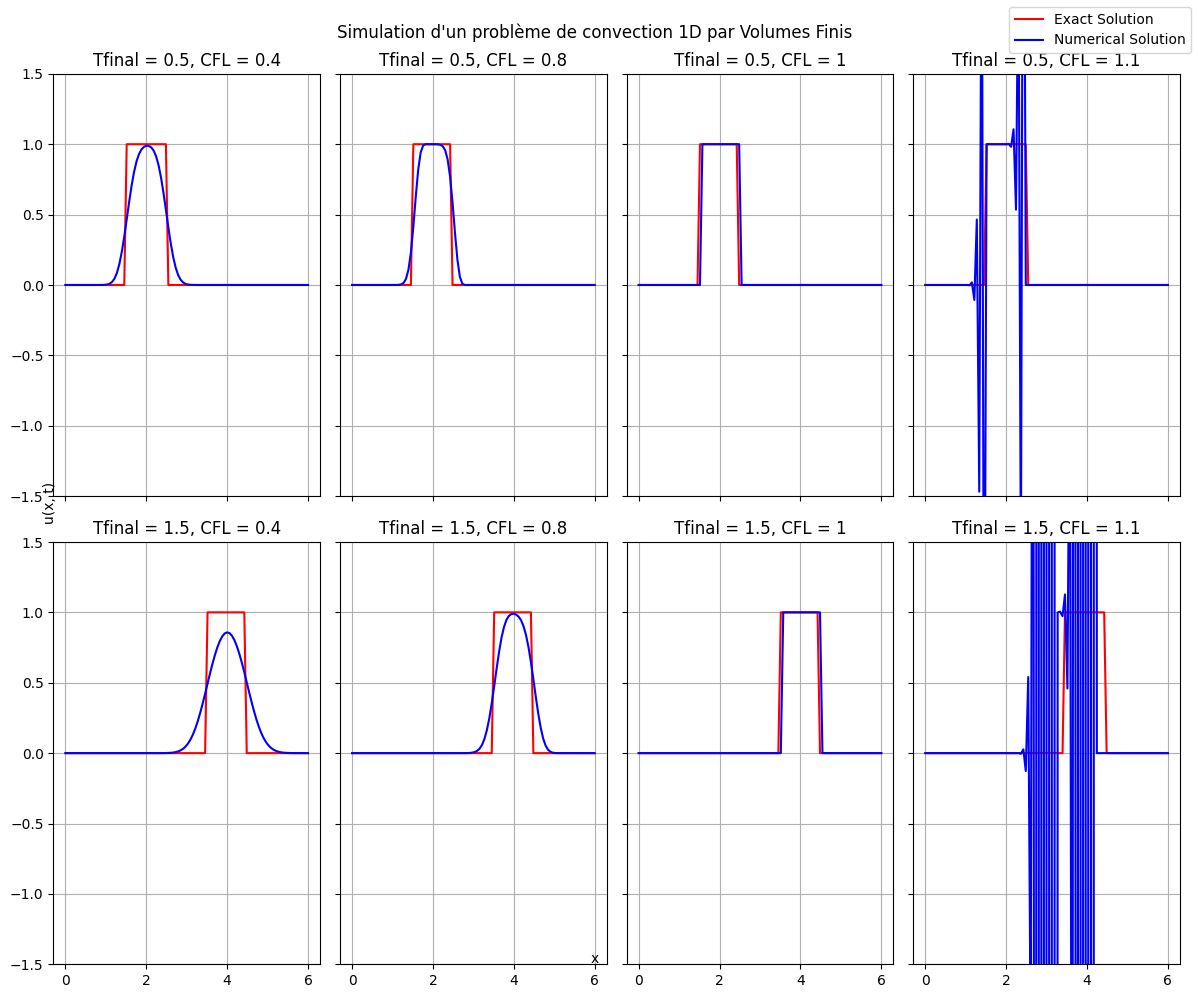

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_convection(CFL, Tfinal):
    # Domain length
    a = 0
    b = 6
    # Number of nodes
    N = 100
    # Mesh step size
    dx = (b - a) / (N - 1)
    # Transport velocity
    c = 2
    x = np.linspace(a, b, N)

    # Initial condition function
    def g(x):
        x = x % b
        if 1/2 <= x <= 3/2:
            return 1
        else:
            return 0

    # Initialize the initial condition
    u = np.zeros(N)
    for i in range(N):
        u[i] = g(x[i])

    # Compute time step to ensure stability
    dt = CFL * dx / abs(c)
    lamda = dt / dx

    unewp = np.zeros(N)
    unewx = np.zeros(N)

    temps = 0

    while temps < Tfinal:
        for i in range(N):
            unewx[i] = g(x[i] - c * temps)
        for i in range(1, N-1):
            flux_left = max(0, c) * u[i-1] + min(c, 0) * u[i]
            flux_right = max(0, c) * u[i] + min(c, 0) * u[i+1]
            unewp[i] = u[i] - lamda * (flux_right - flux_left)  # Upwind scheme
        # Neumann boundary conditions (Zero derivatives)
        unewp[0] = u[N-1]
        unewp[N-1] = unewp[N-2]
        temps += dt
        u = unewp.copy()
        ux = unewx.copy()

    return x, u, ux

# Define values for CFL and Tfinal
CFLs = [0.4, 0.8, 1, 1.1]
Tfinals = [0.5, 1.5]

# Create a figure and subplots
fig, axs = plt.subplots(len(Tfinals), len(CFLs), figsize=(12, 10), sharex=True, sharey=True)

# Loop over each combination of Tfinal and CFL
for ti, Tfinal in enumerate(Tfinals):
    for tj, CFL in enumerate(CFLs):
        x, u, ux = simulate_convection(CFL, Tfinal)
        axs[ti, tj].plot(x, ux, '-r', label='Exact Solution')
        axs[ti, tj].plot(x, u, '-b', label='Numerical Solution')
        axs[ti, tj].set_title(f"Tfinal = {Tfinal}, CFL = {CFL}")
        axs[ti, tj].set_ylim(-1.5, 1.5)  # Limit the y-axis

        axs[ti, tj].grid()

# Add legend to the first subplot only to avoid repetition
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

fig.suptitle("Simulation d'un problème de convection 1D par Volumes Finis")
fig.text(0.5, 0.04, 'x', ha='center')
fig.text(0.04, 0.5, 'u(x, t)', va='center', rotation='vertical')
plt.tight_layout()
plt.show()


In [4]:
#Roe ordre 1 :

#    Pour t=0.5t = 0.5t=0.5 et t=1.5t = 1.5t=1.5 avec CFL = 0.4, 0.8, 1, 1.1

Erreur L2 pour CFL=0.4, Tfinal=0.5: 0.310888104455086
Erreur L2 pour CFL=0.8, Tfinal=0.5: 0.26450072319499174
Erreur L2 pour CFL=1, Tfinal=0.5: 0.34641016151377546
Erreur L2 pour CFL=1.1, Tfinal=0.5: 1.7267537999482228
Erreur L2 pour CFL=0.4, Tfinal=1.5: 0.4063749801288253
Erreur L2 pour CFL=0.8, Tfinal=1.5: 0.3477094080157928
Erreur L2 pour CFL=1, Tfinal=1.5: 0.34641016151377546
Erreur L2 pour CFL=1.1, Tfinal=1.5: 302.3689319358323


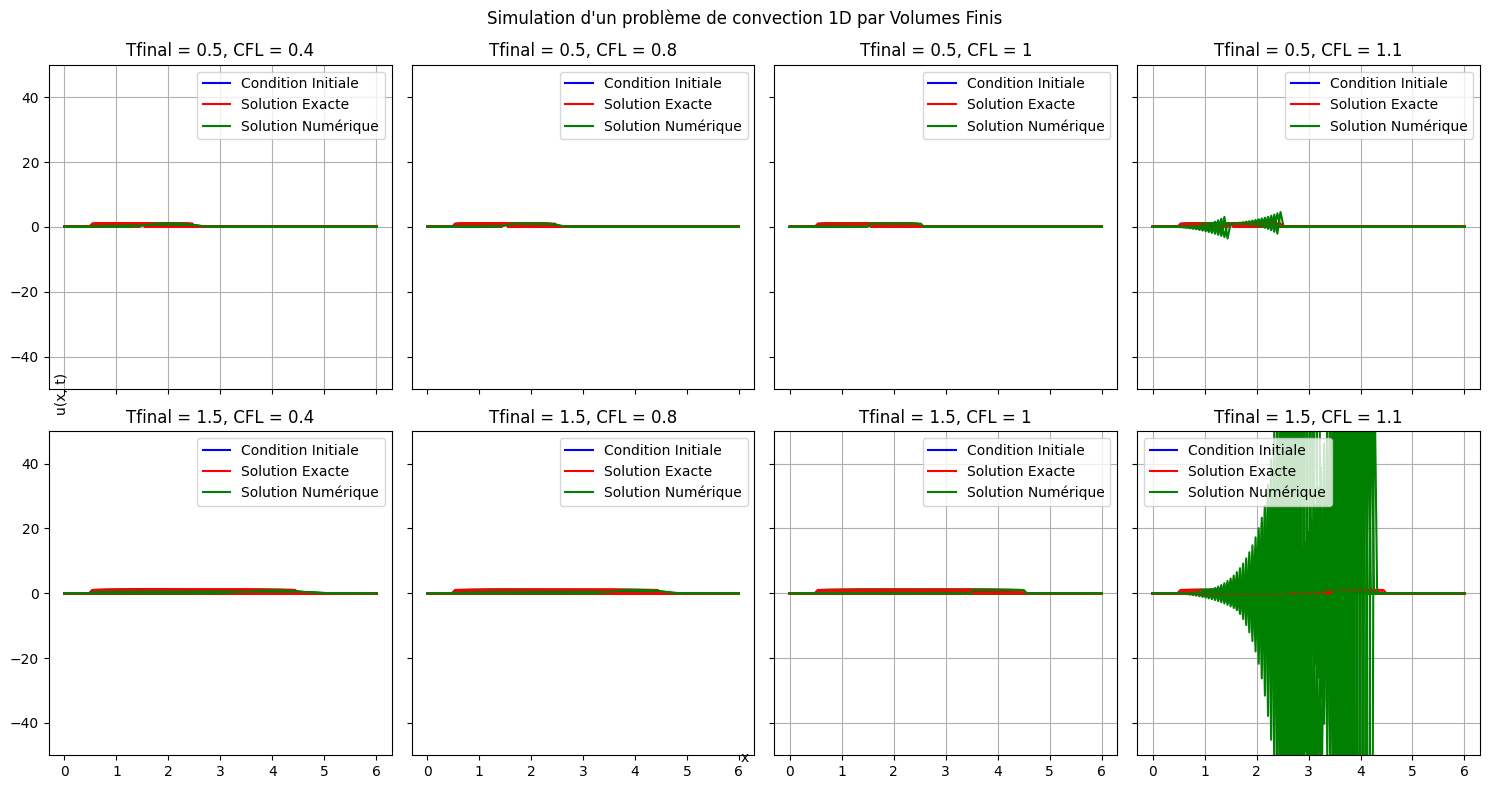

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_convection(CFL, Tfinal, ax=None):
    # Longueur du domaine
    a = 0
    b = 6
    # Nombre de noeuds 
    N = 101
    # Le pas du maillage
    dx = (b-a)/(N-1)
    # Vitesse de transport
    c = 2
    x = np.linspace(a, b, N)
    u = np.zeros(N)

    # Fonction pour la condition initiale
    def g(x):
        x = x % b
        if (1/2) <= x <= (3/2):
            return 1
        else:
            return 0

    # Initialisation de la condition initiale
    for i in range(N):
        u[i] = g(x[i])

    # Tracé de la condition initiale
    if ax is None:
        ax = plt.gca()
    ax.plot(x, u, '-b', label='Condition Initiale')
    ax.grid()
    ax.legend()

    # Calcul du pas de temps pour assurer la stabilité
    dt = CFL * dx / abs(c)
    lamda = dt / dx

    unewp = np.zeros(N)
    unewx = np.zeros(N)

    lamda = dt / dx
    temps = 0

    while temps < Tfinal:
        for i in range(N):
            unewx[i] = g(x[i] - c * temps)
        for i in range(1, N-1):
            flux_left = (c/2) * (u[i-1] + u[i]) - 1/2 * abs(c) * (u[i] - u[i-1])
            flux_right = (c/2) * (u[i] + u[i+1]) - 1/2 * abs(c) * (u[i+1] - u[i])
            unewp[i] = u[i] - lamda * (flux_right - flux_left)  # Schéma décentré amont
        # Conditions aux limites de Neumann (Dérivées nulles)
        unewp[0] = u[N-1]
        unewp[N-1] = unewp[N-2]
        temps += dt
        u = unewp.copy()
        ux = unewx.copy()

        # Tracé des courbes de u et ux au cours du temps
        ax.plot(x, ux, '-r', label='Solution Exacte' if temps <= dt else "")
        ax.plot(x, u, '-g', label='Solution Numérique' if temps <= dt else "")
        ax.set_ylim(-50, 50)
        ax.grid()
        ax.legend()

    # Calcul de l'erreur L2
    Err = np.sqrt(np.sum(dx * (ux - u)**2))
    print(f"Erreur L2 pour CFL={CFL}, Tfinal={Tfinal}: {Err}")

    return x, u, ux

Tfinals = [0.5, 1.5]
CFLs = [0.4, 0.8, 1, 1.1]
fig, axs = plt.subplots(len(Tfinals), len(CFLs), figsize=(15, 8), sharex=True, sharey=True)

for i, Tfinal in enumerate(Tfinals):
    for j, CFL in enumerate(CFLs):
        ax = axs[i, j]
        ax.set_title(f"Tfinal = {Tfinal}, CFL = {CFL}")
        simulate_convection(CFL, Tfinal, ax=ax)

# Ajout de titres et de labels
fig.suptitle("Simulation d'un problème de convection 1D par Volumes Finis")
fig.text(0.5, 0.04, 'x', ha='center')
fig.text(0.04, 0.5, 'u(x, t)', va='center', rotation='vertical')
plt.tight_layout()
plt.show()


# HLL AVEC DELIMITER


/home/conite/.pyenv/versions/3.7.7/envs/ML_ENV/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


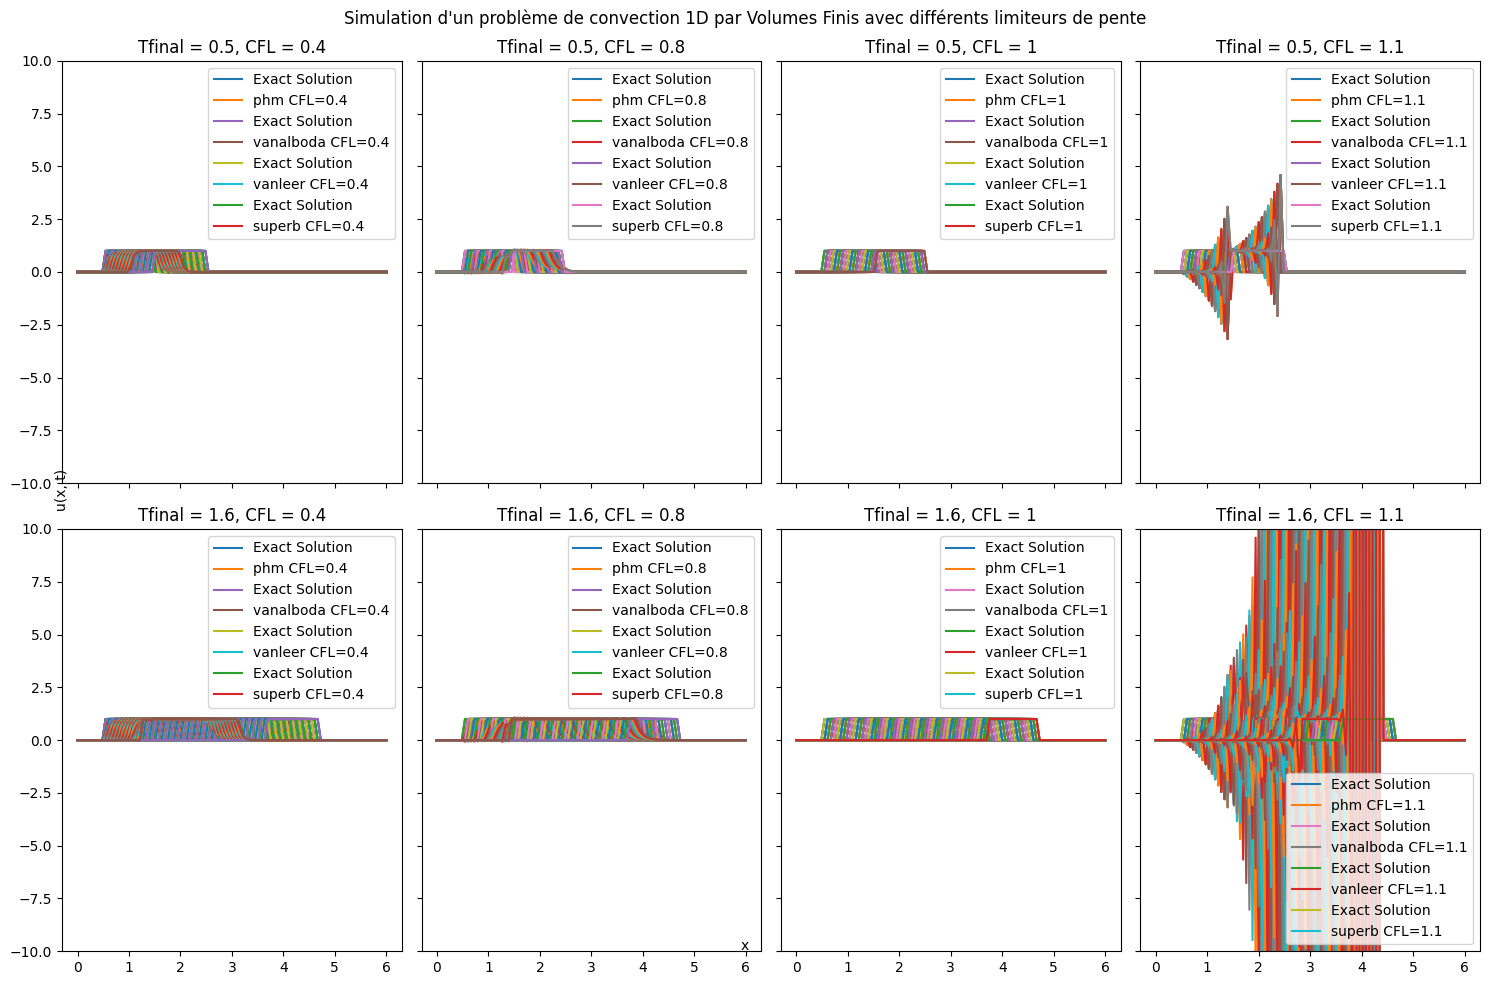

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def phm(x):
    return max(0, min(1, x))

def vanalboda(x):
    return max(0, (x + x**2) / (1 + x**2))

def vanleer(x):
    return (x + abs(x)) / (1 + x)

def superb(x):
    return max(0, min(2*x, 1), min(x, 2))


def simulate_convection_with_limiters(CFL, Tfinal, limiter_func, ax=None):
    # Longueur du domaine
    a = 0
    b = 6
    # Nombre de noeuds 
    N = 100
    # Le pas du maillage
    dx = (b - a) / (N - 1)
    # Vitesse de transport
    c = 2
    x = np.linspace(a, b, N)
    u = np.zeros(N)

    # Fonction pour la condition initiale
    def g(x):
        x = x % b
        if 1/2 <= x <= 3/2:
            return 1
        else:
            return 0

    # Initialisation de la condition initiale
    for i in range(N):
        u[i] = g(x[i])

    # Calcul du pas de temps pour assurer la stabilité
    dt = CFL * dx / abs(c)
    unewp = np.zeros(N)
    unewx = np.zeros(N)

    # Boucle principale de simulation
    temps = 0
    while temps < Tfinal:
        for i in range(N):
            unewx[i] = g(x[i] - c * temps)
        for i in range(1, N - 1):
            # Calcul des coefficients de pente r
            if (u[i + 1] - u[i]) != 0:
                r = (u[i] - u[i - 1]) / (u[i + 1] - u[i])
            else:
                r = 0

            # Calcul des flux avec le limiteur de pente spécifié
            U_L_right = u[i] + 0.5 * limiter_func(r) * (u[i + 1] - u[i])
            if i == N - 2:
                U_R_right = u[N - 1]
            else:
                U_R_right = u[i + 1] - 0.5 * limiter_func(r) * (u[i + 2] - u[i + 1])

            U_L_left = u[i - 1] + 0.5 * limiter_func(r) * (u[i] - u[i - 1])
            U_R_left = u[i] - 0.5 * limiter_func(r) * (u[i + 1] - u[i])

            flux_left = max(0, c) * U_L_left + min(0, c) * U_R_left
            flux_right = max(0, c) * U_L_right + min(0, c) * U_R_right

            unewp[i] = u[i] - dt * (flux_right - flux_left) / dx

        # Conditions aux limites de Neumann (Dérivées nulles)
        unewp[0] = u[N - 1]
        unewp[N - 1] = unewp[N - 2]
        temps += dt
        u = unewp.copy()
        ux = unewx.copy()

        # Tracé des courbes de u et ux au cours du temps
        ax.plot(x, ux, '-', label='Exact Solution' if temps <= dt else "")
        ax.plot(x, u, '-', label=f'{limiter_func.__name__} CFL={CFL}' if temps <= dt else "")
        ax.set_ylim(-10, 10)
        ax.grid()
        ax.legend()

    return x, u, ux


Tfinals = [0.5,1.6]
CFLs = [0.4, 0.8, 1, 1.1]
limiters = [phm, vanalboda, vanleer, superb]

fig, axs = plt.subplots(len(Tfinals), len(CFLs), figsize=(15, 10), sharex=True, sharey=True)

for i, Tfinal in enumerate(Tfinals):
    for j, CFL in enumerate(CFLs):
        ax = axs[i, j]
        ax.set_title(f"Tfinal = {Tfinal}, CFL = {CFL}")
        for limiter_func in limiters:
            simulate_convection_with_limiters(CFL, Tfinal, limiter_func, ax=ax)

# Ajout de titres et de labels
fig.suptitle("Simulation d'un problème de convection 1D par Volumes Finis avec différents limiteurs de pente")
fig.text(0.5, 0.04, 'x', ha='center')
fig.text(0.04, 0.5, 'u(x, t)', va='center', rotation='vertical')
plt.tight_layout()
plt.show()


# HLL ordre 1 et avec les 4 limiteurs de pentes (minmod, van Leer, ...)  
tf 0.5, 1.5 CFL 0.6

/home/conite/.pyenv/versions/3.7.7/envs/ML_ENV/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


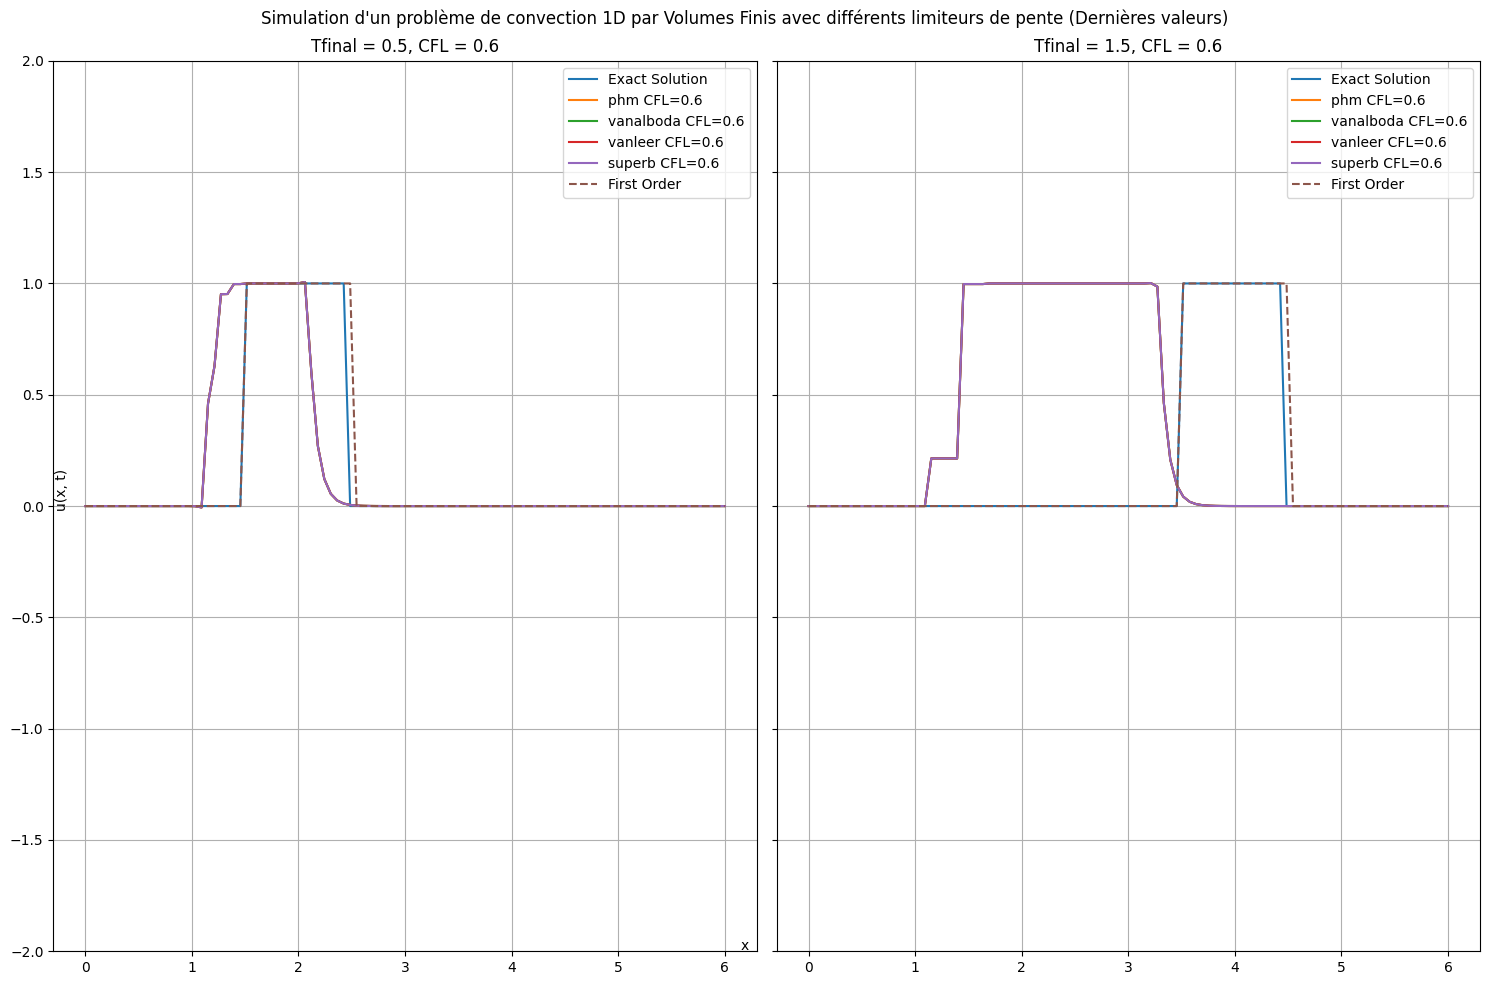

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def phm(x):
    return max(0, min(1, x))

def vanalboda(x):
    return max(0, (x + x**2) / (1 + x**2))

def vanleer(x):
    return (x + abs(x)) / (1 + x)

def superb(x):
    return max(0, min(2*x, 1), min(x, 2))

def simulate_convection_with_limiters(CFL, Tfinal, limiters, ax=None):
    # Longueur du domaine
    a = 0
    b = 6
    # Nombre de noeuds 
    N = 100
    # Le pas du maillage
    dx = (b - a) / (N - 1)
    # Vitesse de transport
    c = 2
    x = np.linspace(a, b, N)
    u = np.zeros(N)

    # Fonction pour la condition initiale
    def g(x):
        x = x % b
        if 1/2 <= x <= 3/2:
            return 1
        else:
            return 0

    # Initialisation de la condition initiale
    for i in range(N):
        u[i] = g(x[i])

    # Calcul du pas de temps pour assurer la stabilité
    dt = CFL * dx / abs(c)
    unewp = np.zeros(N)
    unewx = np.zeros(N)

    # Liste pour stocker les solutions pour chaque limiter_func
    us = []

    # Boucle principale de simulation
    temps = 0
    while temps < Tfinal:
        for i in range(N):
            unewx[i] = g(x[i] - c * temps)
        for i in range(1, N - 1):
            # Calcul des coefficients de pente r
            if (u[i + 1] - u[i]) != 0:
                r = (u[i] - u[i - 1]) / (u[i + 1] - u[i])
            else:
                r = 0

            # Calcul des flux avec le limiteur de pente spécifié pour chaque limiter_func
            fluxes = []
            for limiter_func in limiters:
                U_L_right = u[i] + 0.5 * limiter_func(r) * (u[i + 1] - u[i])
                if i == N - 2:
                    U_R_right = u[N - 1]
                else:
                    U_R_right = u[i + 1] - 0.5 * limiter_func(r) * (u[i + 2] - u[i + 1])

                U_L_left = u[i - 1] + 0.5 * limiter_func(r) * (u[i] - u[i - 1])
                U_R_left = u[i] - 0.5 * limiter_func(r) * (u[i + 1] - u[i])

                flux_left = max(0, c) * U_L_left + min(0, c) * U_R_left
                flux_right = max(0, c) * U_L_right + min(0, c) * U_R_right

                unewp[i] = u[i] - dt * (flux_right - flux_left) / dx

                fluxes.append(unewp.copy())  # Copie de unewp pour chaque limiter_func

            us.append(fluxes)

        # Conditions aux limites de Neumann (Dérivées nulles)
        unewp[0] = u[N - 1]
        unewp[N - 1] = unewp[N - 2]
        temps += dt
        u = unewp.copy()
        ux = unewx.copy()

    # Tracé des courbes de u et ux pour les dernières valeurs seulement
    ax.plot(x, ux, '-', label='Exact Solution' )
    for i, limiter_func in enumerate(limiters):
        ax.plot(x, us[-1][i], '-', label=f'{limiter_func.__name__} CFL={CFL}' )

    # Calcul de la solution de première ordre
    u_first_order = np.zeros(N)
    for i in range(N):
        u_first_order[i] = g(x[i] - c * Tfinal)

    ax.plot(x, u_first_order, '--', label='First Order' )

    ax.set_ylim(-2, 2)
    ax.grid()

    # Affichage de la légende à la fin
    ax.legend()

    return x, u, ux

Tfinals = [0.5, 1.5]
CFLs = [0.6]
limiters = [phm, vanalboda, vanleer, superb]

fig, axs = plt.subplots(len(CFLs), len(Tfinals), figsize=(15, 10), sharex=True, sharey=True)

for i, Tfinal in enumerate(Tfinals):
    for j, CFL in enumerate(CFLs):
        ax = axs[i]  # Utilisation de axs[i] pour accéder à chaque sous-axe
        ax.set_title(f"Tfinal = {Tfinal}, CFL = {CFL}")
        
        simulate_convection_with_limiters(CFL, Tfinal, limiters, ax=ax)

# Ajout de titres et de labels
fig.suptitle("Simulation d'un problème de convection 1D par Volumes Finis avec différents limiteurs de pente (Dernières valeurs)")
fig.text(0.5, 0.04, 'x', ha='center')
fig.text(0.04, 0.5, 'u(x, t)', va='center', rotation='vertical')
plt.tight_layout()
plt.show()


    # ROE AVEC DELIMITER
TF =0.5, 1.5
CFL :0.1, 0.4, 0.8, 1.1

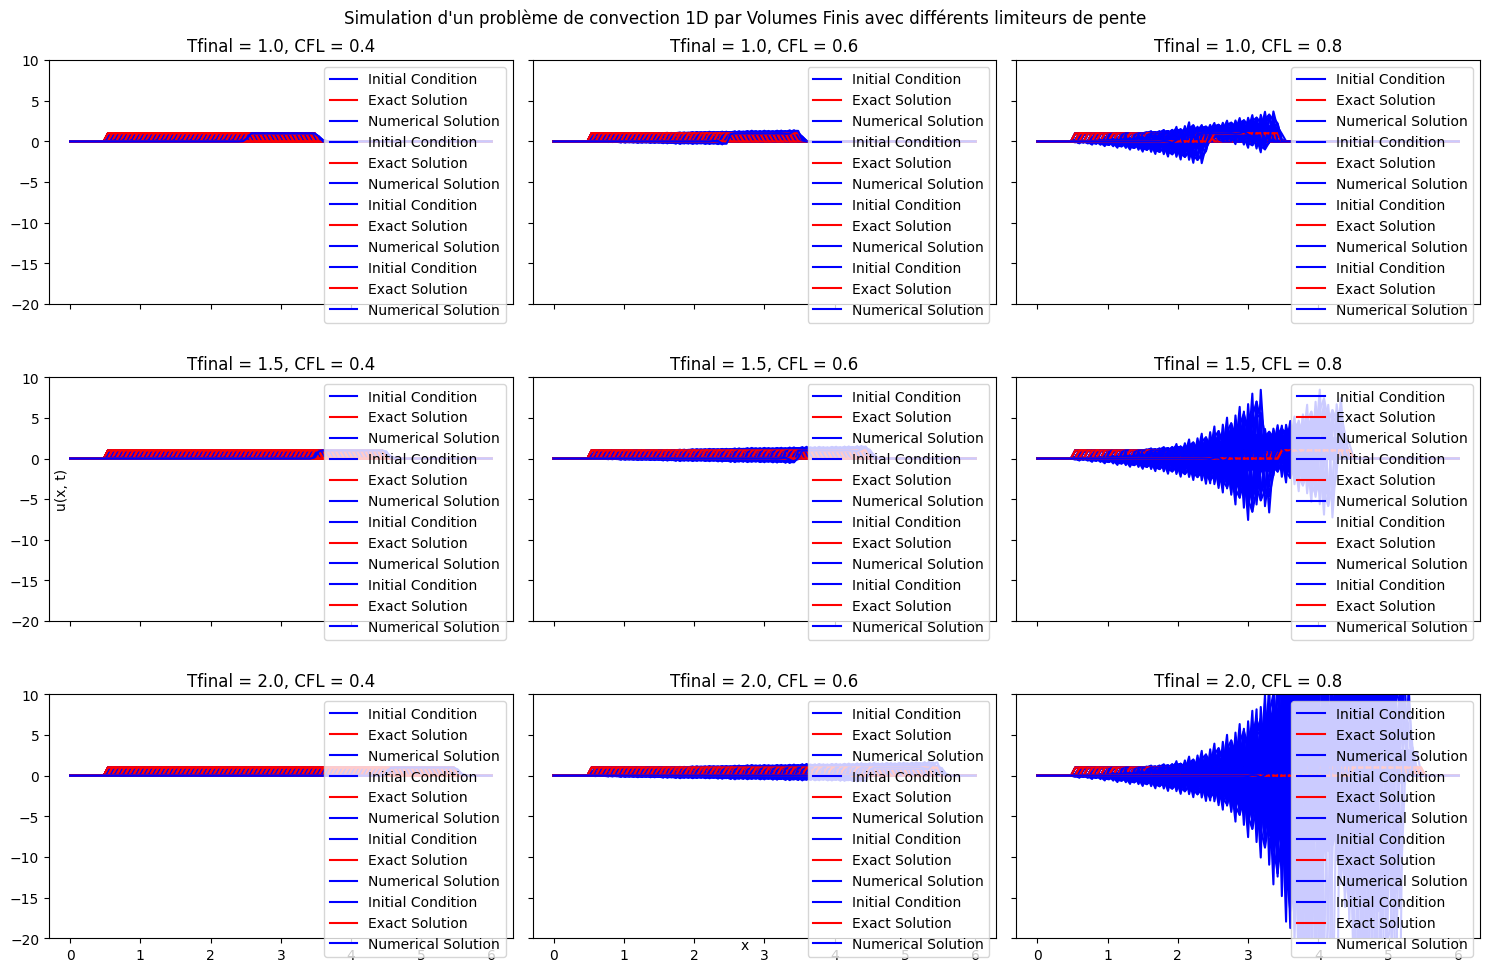

In [14]:
# ROE AVEC DELIMITER

import numpy as np
import matplotlib.pyplot as plt

# Fonctions de limiteurs de pente
def phm(x):
    return max(0, min(1, x))

def vanalboda(x):
    return max(0, (x + x**2) / (1 + x**2))

def vanleer(x):
    return (x + abs(x)) / (1 + x)

def superb(x):
    return max(0, min(2*x, 1), min(x, 2))

# Fonction pour la condition initiale
def g(x, b):
    x = x % b
    if 1/2 <= x <= 3/2:
        return 1
    else:
        return 0

# Fonction pour simuler la convection avec limiteurs de pente
def simulate_convection_with_limiters(a, b, N, CFL, Tfinal, limiter_func, ax=None):
    # Le pas du maillage
    dx = (b - a) / (N - 1)
    # Vitesse de transport
    c = 2
    x = np.linspace(a, b, N)
    u = np.zeros(N)

    # Initialisation de la condition initiale
    for i in range(N):
        u[i] = g(x[i], b)

    # Tracé de la condition initiale
    ax.plot(x, u, '-b', label='Initial Condition')
    ax.grid()
    ax.legend()

    # Calcul du pas de temps pour assurer la stabilité
    dt = CFL * dx / abs(c)
    unewp = np.zeros(N)
    unewx = np.zeros(N)
    lamda = dt / dx
    temps = 0
    r = np.zeros(N)

    while temps < Tfinal:
        for i in range(N):
            unewx[i] = g(x[i] - c * temps, b)
        
        for i in range(1, N-1):
            if (u[i+1] - u[i]) != 0:
                r[i] = (u[i] - u[i-1]) / (u[i+1] - u[i])
            else:
                r[i] = 0
            
            if (u[i] - u[i-1]) != 0:
                r[i-1] = (u[i-1] - u[i-2]) / (u[i] - u[i-1])
            else:
                r[i-1] = 0
            
            if i == N-2:
                r[i+1] = 0
            else:
                if (u[i+2] - u[i+1]) != 0:
                    r[i+1] = (u[i+1] - u[i]) / (u[i+2] - u[i+1])
                else:
                    r[i+1] = 0
            
            U_L_right = u[i] + 0.5 * limiter_func(r[i]) * (u[i+1] - u[i])
            if i == N-2:
                U_R_right = u[N-1]
            else:
                U_R_right = u[i+1] - 0.5 * limiter_func(r[i+1]) * (u[i+2] - u[i+1])
            
            U_L_left = u[i-1] + 0.5 * limiter_func(r[i-1]) * (u[i] - u[i-1])
            U_R_left = u[i] - 0.5 * limiter_func(r[i]) * (u[i+1] - u[i])
            
            flux_left = (c / 2) * (U_L_left + U_R_left) - 0.5 * abs(c) * (U_R_left - U_L_left)
            flux_right = (c / 2) * (U_L_right + U_R_right) - 0.5 * abs(c) * (U_R_right - U_L_right)
            
            unewp[i] = u[i] - lamda * (flux_right - flux_left)
        
        # Conditions aux limites de Neumann (Dérivées nulles)
        unewp[0] = u[N-1]
        unewp[N-1] = unewp[N-2]
        temps += dt
        u = unewp.copy()
        ux = unewx.copy()

        # Tracé des courbes de u et ux au cours du temps
        ax.plot(x, ux, '-r', label='Exact Solution' if temps <= dt else "")
        ax.plot(x, u, '-b', label='Numerical Solution' if temps <= dt else "")
        ax.set_ylim(-10, 10)
        ax.grid()
        ax.legend()

    # Calcul de l'erreur
    Err = 0   
    for i in range(N):
        Err += dx * (ux[i] - u[i]) ** 2
    Err = np.sqrt(Err)

    return Err

# Paramètres de simulation
a = 0
b = 6
N = 101
CFLs = [0.4, 0.6, 0.8]
Tfinals = [1.0, 1.5, 2.0]
limiters = [phm, vanalboda, vanleer, superb]

# Création de la figure avec plusieurs sous-graphiques
fig, axs = plt.subplots(len(Tfinals), len(CFLs), figsize=(15, 10), sharex=True, sharey=True)

# Boucle sur les valeurs de Tfinal, CFL et limiteur de pente pour tracer les solutions
for i, Tfinal in enumerate(Tfinals):
    for j, CFL in enumerate(CFLs):
        ax = axs[i, j]
        ax.set_title(f"Tfinal = {Tfinal}, CFL = {CFL}")
        for limiter_func in limiters:
            simulate_convection_with_limiters(a, b, N, CFL, Tfinal, limiter_func, ax=ax)

# Ajout de titres et de labels
fig.suptitle("Simulation d'un problème de convection 1D par Volumes Finis avec différents limiteurs de pente")
fig.text(0.5, 0.04, 'x', ha='center')
fig.text(0.04, 0.5, 'u(x, t)', va='center', rotation='vertical')
plt.tight_layout()
plt.show()


In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du domaine
a = 0
b = 900
N = 300
dx = (b - a) / (N - 1)
x = np.linspace(a, b, N)

# Nombre CFL (0 < CFL <= 1)
CFL = 0.5

# Initialisation de la solution u et h
u = np.zeros(N)
h = np.zeros(N)
q=np.zeros(N)
qnewp=np.zeros(N)
# Fonction pour la condition initiale de la hauteur h (rupture du barrage)
def f(x):
    if 0 <= x <= 450:
        return 2  # Hauteur de l'eau avant la rupture
    else:
        return 0  # Hauteur de l'eau après la rupture

# Initialisation de la condition initiale
for i in range(N):
    h[i] = f(x[i])

# # Tracé de la condition initiale
# plt.plot(x, h, '-r', label='Hauteur initiale (h)')
# plt.xlabel('x')
# plt.ylabel('Hauteur de l\'eau')
# plt.title('Condition initiale de la rupture du barrage')
# plt.grid()
# plt.legend()
# plt.show()

# Tableau pour les nouvelles valeurs de u et h
unewp = np.zeros(N)
hnewp = np.zeros(N)

g = 9.81  # Accélération due à la gravité
Tfinal = 20  # Temps final de la simulation
temps = 0
while temps < Tfinal:
    # Calcul du pas de temps pour assurer la stabilité
    s_1 = np.abs(u + np.sqrt(g * h))
    s_2 = np.abs(u - np.sqrt(g * h))
    S_1max=max(s_1)
    S_2max=max(s_2)
    max_u = max(S_1max, S_2max)
   
    dt = CFL * dx / max_u
    lamda = dt / dx

    # Mise à jour de la solution numérique
    for i in range(1, N-1):

        S_RR = max(u[i+1] +np.sqrt(g*h[i+1]),u[i] +np.sqrt(g*h[i]))
        S_LR = min(u[i+1] -np.sqrt(g*h[i+1]),u[i] -np.sqrt(g*h[i]))
        if S_RR == S_LR:
            if S_LR > 0:
                flux_right_h = u[i]*h[i]
                flux_right_u = (u[i]**2)*h[i] +(1/2)*g*h[i]**2
            elif  S_RR==0:
                flux_right_h = 0
                flux_right_u = 0
                
            else:
                flux_right_h = u[i+1]*h[i+1]
                flux_right_u = (u[i+1]**2)*h[i+1] +(1/2)*g*h[i+1]**2
            
        else:
            if S_LR > 0:
                flux_right_h = u[i]*h[i]
                flux_right_u = (u[i]**2)*h[i] +(1/2)*g*h[i]**2
            elif S_LR <= 0 <= S_RR:
                flux_right_h = (S_RR * u[i]*h[i] - S_LR * u[i+1]*h[i+1] + S_LR * S_RR * ( h[i+1]- h[i] )) / (S_RR - S_LR)
                flux_right_u =( S_RR * ((u[i]**2)*h[i] +(1/2)*g*h[i]**2) - S_LR * ((u[i+1]**2)*h[i+1] +(1/2)*g*h[i+1]**2) + S_LR * S_RR * ( u[i+1]- u[i] )) / (S_RR - S_LR)
            else:
                flux_right_h = u[i+1]*h[i+1]
                flux_right_u =(u[i+1]**2)*h[i+1] +(1/2)*g*h[i+1]**2
                
        S_RL = max(u[i] +np.sqrt(g*h[i]),u[i-1] +np.sqrt(g*h[i-1]))
        S_LL = min(u[i-1] -np.sqrt(h[i-1]),u[i] -np.sqrt(g*h[i]))
        if S_RL == S_LL:
            if S_LL > 0:
                flux_left_h = u[i-1]*h[i-1]
                flux_left_u =(u[i-1]**2)*h[i-1] +(1/2)*g*h[i-1]**2
            elif  S_RL==0:
                flux_left_h = 0
                flux_left_u= 0
            else:
                flux_left_h= u[i]*h[i]
                flux_left_u= (u[i]**2)*h[i] +(1/2)*g*h[i]**2
        else:
            if S_LL > 0:
                flux_left_h =u[i-1]*h[i-1]
                flux_left_u = (u[i-1]**2)*h[i-1] +(1/2)*g*h[i-1]**2
            elif S_LL <= 0 <= S_RL:
                flux_left_h =(S_RL * u[i-1]*h[i-1] - S_LL * u[i]*h[i] + S_LL * S_RL * ( h[i]- h[i-1] )) / (S_RL - S_LL)
                flux_left_u =  (S_RL * ((u[i-1]**2)*h[i-1] +(1/2)*g*h[i-1]**2) - S_LL * ((u[i]**2)*h[i] +(1/2)*g*h[i]**2)+ S_LL * S_RL * ( u[i]- u[i-1] )) / (S_RL - S_LL)
            else:
                flux_left_h = u[i]*h[i]
                flux_left_u = (u[i]**2)*h[i] +(1/2)*g*h[i]**2
        hnewp[i] = h[i] - lamda * (flux_right_h - flux_left_h)
        if hnewp[i]==0:
            unewp[i]=0
        else:
            unewp[i] = (1/hnewp[i])*(h[i]*u[i] - lamda * (flux_right_u - flux_left_u))

    # Conditions aux limites de Neumann (Dérivées nulles)
    hnewp[N-1] = hnewp[N-2]
    hnewp[0] = hnewp[1]
    unewp[N-1] = unewp[N-2]
    unewp[0] = unewp[1]
    for i in range(N):
          qnewp[i]=hnewp[i]*unewp[i]
          
      # Mise à jour du temps
    temps += dt
      # Mise à jour de u et h
    u = unewp.copy()
    h = hnewp.copy()
    q=qnewp.copy()

# plt.plot(x, h, '-r', label='Exact Solution H' )
# plt.plot(x, u, '-b', label='Numerical Solution U')
# plt.plot(x, q, '-g', label='Numerical Solution Q')
# plt.title('HLL')
# plt.grid()
# plt.legend()
# plt.show()




## ROE SV

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du domaine
a = 0
b = 900
N = 300
dx = (b - a) / (N - 1)
x = np.linspace(a, b, N)

# Nombre CFL (0 < CFL <= 1)
CFL = 0.6

# Initialisation de la solution u et h
u = np.zeros(N)
h = np.zeros(N)
q=np.zeros(N)
qnewp=np.zeros(N)
# Fonction pour la condition initiale de la hauteur h (rupture du barrage)
def f(x):
    if 0 <= x <= 450:
        return 2  # Hauteur de l'eau avant la rupture
    else:
        return 0  # Hauteur de l'eau après la rupture

# Initialisation de la condition initiale
for i in range(N):
    h[i] = f(x[i])

# # Tracé de la condition initiale
# plt.plot(x, h, '-r', label='Hauteur initiale (h)')
# plt.xlabel('x')
# plt.ylabel('Hauteur de l\'eau')
# plt.title('Condition initiale de la rupture du barrage')
# plt.grid()
# plt.legend()
# plt.show()

# Tableau pour les nouvelles valeurs de u et h
unewp = np.zeros(N)
hnewp = np.zeros(N)

g = 9.81  # Accélération due à la gravité
Tfinal = 10  # Temps final de la simulation
temps = 0


while temps < Tfinal:
    # Calcul du pas de temps pour assurer la stabilité
    s_1 = np.abs(u + np.sqrt(g * h))
    s_2 = np.abs(u - np.sqrt(g * h))
    S_1max=max(s_1)
    S_2max=max(s_2)
    max_u = max(S_1max, S_2max)
   
    dt = CFL * dx / max_u
    lamda = dt / dx
    P= np.ones((2, 2))
    D= np.zeros((2, 2))
    PI= np.ones((2, 2))
    y=np.zeros(2)
    # Mise à jour de la solution numérique
    for i in range(1, N-1):
        h_tild_r=(h[i]+h[i+1])/2
        if h[i]==0 and h[i+1]==0:
            u_tild_r=0
        else:   
            u_tild_r=((np.sqrt(h[i])*u[i]+np.sqrt(h[i+1])*u[i+1])/(np.sqrt(h[i])+np.sqrt(h[i+1])))
        y[0]=h[i+1]-h[i]
        y[1]= h[i+1]*u[i+1]-h[i]*u[i]
        P[1][0]=u_tild_r-np.sqrt(g*h_tild_r)
        P[1][1]=u_tild_r+np.sqrt(g*h_tild_r)
        D[0][0]= np.abs(u_tild_r-np.sqrt(g*h_tild_r))
        D[1][1]= np.abs(u_tild_r+np.sqrt(g*h_tild_r))
        PI[0][0]=u_tild_r+np.sqrt(g*h_tild_r)
        PI[1][0]=np.sqrt(g*h_tild_r)-u_tild_r
        PI[0][1]=-1
        A = np.dot(P, np.dot(D, np.dot(PI, y)))
        if h_tild_r==0:
            flux_right_h=0
            flux_right_u =0
        else:
            flux_right_h = 1/2*(u[i]*h[i] +u[i+1]*h[i+1]) -(1/(4*np.sqrt(g*h_tild_r)))*A[0]
            flux_right_u = 1/2*((u[i]**2)*h[i] +(1/2)*g*h[i]**2 + (u[i+1]**2)*h[i+1] +(1/2)*g*h[i+1]**2)-(1/(4*np.sqrt(g*h_tild_r)))*A[1]
        h_tild_r=(h[i-1]+h[i])/2
        if h[i]==0 and h[i-1]==0:
            u_tild_r=0
        else:

            u_tild_r=((np.sqrt(h[i-1])*u[i-1]+np.sqrt(h[i])*u[i])/(np.sqrt(h[i-1])+np.sqrt(h[i])))
        y[0]=h[i]-h[i-1]
        y[1]= h[i]*u[i]-h[i-1]*u[i-1]
        P[1][0]=u_tild_r-np.sqrt(g*h_tild_r)
        P[1][1]=u_tild_r+np.sqrt(g*h_tild_r)
        D[0][0]= np.abs(u_tild_r-np.sqrt(g*h_tild_r))
        D[1][1]= np.abs(u_tild_r+np.sqrt(g*h_tild_r))
        PI[0][0]=u_tild_r+np.sqrt(g*h_tild_r)
        PI[1][0]=np.sqrt(g*h_tild_r)-u_tild_r
        PI[0][1]=-1
        A = np.dot(P, np.dot(D, np.dot(PI, y)))
        if h_tild_r==0:
            flux_left_h =0
            flux_left_u =0
        else:
            flux_left_h = 1/2*(u[i-1]*h[i-1] +u[i]*h[i]) -(1/(4*np.sqrt(g*h_tild_r)))*A[0]
            flux_left_u = 1/2*((u[i-1]**2)*h[i-1] +(1/2)*g*h[i-1]**2 + (u[i]**2)*h[i] +(1/2)*g*h[i]**2)-(1/(4*np.sqrt(g*h_tild_r)))*A[1]
        hnewp[i] = h[i] - lamda * (flux_right_h - flux_left_h)
        if hnewp[i]==0:
            unewp[i]=0
        else:
            unewp[i] = (1/hnewp[i])*(h[i]*u[i] - lamda * (flux_right_u - flux_left_u))

    # Conditions aux limites de Neumann (Dérivées nulles)
    hnewp[N-1] = hnewp[N-2]
    hnewp[0] = hnewp[1]
    unewp[N-1] = unewp[N-2]
    unewp[0] = unewp[1]
    for i in range(N):
          qnewp[i]=hnewp[i]*unewp[i]
          
      # Mise à jour du temps
    temps += dt
      # Mise à jour de u et h
    u = unewp.copy()
    h = hnewp.copy()
    q=qnewp.copy()
# Tracé des courbes de u et unewx au cours du temps
# plt.plot(x, h, '-r', label='Exact Solution H' )
# plt.plot(x, u, '-b', label='Numerical Solution U')
# plt.plot(x, q, '-g', label='Numerical Solution Q')
# plt.title('ROE')
# plt.grid()
# plt.legend()
# plt.show()


In [69]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_convection_with_ROE(a=0, b=900, N=300, CFL=0.6, Tfinal=10):
    # Paramètres du domaine
    dx = (b - a) / (N - 1)
    x = np.linspace(a, b, N)

    # Initialisation de la solution u et h
    u = np.zeros(N)
    h = np.zeros(N)
    q = np.zeros(N)

    # Fonction pour la condition initiale de la hauteur h (rupture du barrage)
    def f(x):
        if 0 <= x <= 450:
            return 2  # Hauteur de l'eau avant la rupture
        else:
            return 0  # Hauteur de l'eau après la rupture

    # Initialisation de la condition initiale
    for i in range(N):
        h[i] = f(x[i])

    g = 9.81  # Accélération due à la gravité
    temps = 0

    while temps < Tfinal:
        # Calcul du pas de temps pour assurer la stabilité
        s_1 = np.abs(u + np.sqrt(g * h))
        s_2 = np.abs(u - np.sqrt(g * h))
        S_1max = max(s_1)
        S_2max = max(s_2)
        max_u = max(S_1max, S_2max)

        dt = CFL * dx / max_u
        lamda = dt / dx

        # Mise à jour de la solution numérique
        for i in range(1, N - 1):
            h_tild_r = (h[i] + h[i + 1]) / 2
            if h[i] == 0 and h[i + 1] == 0:
                u_tild_r = 0
            else:
                u_tild_r = ((np.sqrt(h[i]) * u[i] + np.sqrt(h[i + 1]) * u[i + 1]) / (np.sqrt(h[i]) + np.sqrt(h[i + 1])))

            y = np.zeros(2)
            P = np.ones((2, 2))
            D = np.zeros((2, 2))
            PI = np.ones((2, 2))

            y[0] = h[i + 1] - h[i]
            y[1] = h[i + 1] * u[i + 1] - h[i] * u[i]

            P[1][0] = u_tild_r - np.sqrt(g * h_tild_r)
            P[1][1] = u_tild_r + np.sqrt(g * h_tild_r)

            D[0][0] = np.abs(u_tild_r - np.sqrt(g * h_tild_r))
            D[1][1] = np.abs(u_tild_r + np.sqrt(g * h_tild_r))

            PI[0][0] = u_tild_r + np.sqrt(g * h_tild_r)
            PI[1][0] = np.sqrt(g * h_tild_r) - u_tild_r
            PI[0][1] = -1

            A = np.dot(P, np.dot(D, np.dot(PI, y)))

            if h_tild_r == 0:
                flux_right_h = 0
                flux_right_u = 0
            else:
                flux_right_h = 1 / 2 * (u[i] * h[i] + u[i + 1] * h[i + 1]) - (1 / (4 * np.sqrt(g * h_tild_r))) * A[0]
                flux_right_u = 1 / 2 * ((u[i] ** 2) * h[i] + (1 / 2) * g * h[i] ** 2 + (u[i + 1] ** 2) * h[i + 1] + (
                            1 / 2) * g * h[i + 1] ** 2) - (1 / (4 * np.sqrt(g * h_tild_r))) * A[1]

            h_tild_r = (h[i - 1] + h[i]) / 2
            if h[i] == 0 and h[i - 1] == 0:
                u_tild_r = 0
            else:
                u_tild_r = ((np.sqrt(h[i - 1]) * u[i - 1] + np.sqrt(h[i]) * u[i]) / (
                            np.sqrt(h[i - 1]) + np.sqrt(h[i])))

            y[0] = h[i] - h[i - 1]
            y[1] = h[i] * u[i] - h[i - 1] * u[i - 1]

            P[1][0] = u_tild_r - np.sqrt(g * h_tild_r)
            P[1][1] = u_tild_r + np.sqrt(g * h_tild_r)

            D[0][0] = np.abs(u_tild_r - np.sqrt(g * h_tild_r))
            D[1][1] = np.abs(u_tild_r + np.sqrt(g * h_tild_r))

            PI[0][0] = u_tild_r + np.sqrt(g * h_tild_r)
            PI[1][0] = np.sqrt(g * h_tild_r) - u_tild_r
            PI[0][1] = -1

            A = np.dot(P, np.dot(D, np.dot(PI, y)))

            if h_tild_r == 0:
                flux_left_h = 0
                flux_left_u = 0
            else:
                flux_left_h = 1 / 2 * (u[i - 1] * h[i - 1] + u[i] * h[i]) - (1 / (4 * np.sqrt(g * h_tild_r))) * A[0]
                flux_left_u = 1 / 2 * ((u[i - 1] ** 2) * h[i - 1] + (1 / 2) * g * h[i - 1] ** 2 + (u[i] ** 2) * h[i] + (
                            1 / 2) * g * h[i] ** 2) - (1 / (4 * np.sqrt(g * h_tild_r))) * A[1]

            hnewp[i] = h[i] - lamda * (flux_right_h - flux_left_h)
            if hnewp[i] == 0:
                unewp[i] = 0
            else:
                unewp[i] = (1 / hnewp[i]) * (h[i] * u[i] - lamda * (flux_right_u - flux_left_u))

        # Conditions aux limites de Neumann (Dérivées nulles)
        hnewp[N - 1] = hnewp[N - 2]
        hnewp[0] = hnewp[1]
        unewp[N - 1] = unewp[N - 2]
        unewp[0] = unewp[1]

        for i in range(N):
            q[i] = h[i] * u[i]

        # Mise à jour du temps
        temps += dt

        # Mise à jour de u et h
        u = unewp.copy()
        h = hnewp.copy()

    # Retourner les valeurs finales de h, u, q, x
    return h, u, q, x

# Fonction pour tracer une courbe donnée



In [73]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_convection_HLL(a=0, b=900, N=300, CFL=0.5, Tfinal=20):
    # Paramètres du domaine
    dx = (b - a) / (N - 1)
    x = np.linspace(a, b, N)

    # Initialisation de la solution u et h
    u = np.zeros(N)
    h = np.zeros(N)
    q = np.zeros(N)
    qnewp = np.zeros(N)

    # Fonction pour la condition initiale de la hauteur h (rupture du barrage)
    def f(x):
        if 0 <= x <= 450:
            return 2  # Hauteur de l'eau avant la rupture
        else:
            return 0  # Hauteur de l'eau après la rupture

    # Initialisation de la condition initiale
    for i in range(N):
        h[i] = f(x[i])

    g = 9.81  # Accélération due à la gravité
    temps = 0

    while temps < Tfinal:
        # Calcul du pas de temps pour assurer la stabilité
        s_1 = np.abs(u + np.sqrt(g * h))
        s_2 = np.abs(u - np.sqrt(g * h))
        S_1max = max(s_1)
        S_2max = max(s_2)
        max_u = max(S_1max, S_2max)

        dt = CFL * dx / max_u
        lamda = dt / dx

        # Mise à jour de la solution numérique
        for i in range(1, N - 1):
            S_RR = max(u[i + 1] + np.sqrt(g * h[i + 1]), u[i] + np.sqrt(g * h[i]))
            S_LR = min(u[i + 1] - np.sqrt(g * h[i + 1]), u[i] - np.sqrt(g * h[i]))

            if S_RR == S_LR:
                if S_LR > 0:
                    flux_right_h = u[i] * h[i]
                    flux_right_u = (u[i] ** 2) * h[i] + (1 / 2) * g * h[i] ** 2
                elif S_RR == 0:
                    flux_right_h = 0
                    flux_right_u = 0
                else:
                    flux_right_h = u[i + 1] * h[i + 1]
                    flux_right_u = (u[i + 1] ** 2) * h[i + 1] + (1 / 2) * g * h[i + 1] ** 2
            else:
                if S_LR > 0:
                    flux_right_h = u[i] * h[i]
                    flux_right_u = (u[i] ** 2) * h[i] + (1 / 2) * g * h[i] ** 2
                elif S_LR <= 0 <= S_RR:
                    flux_right_h = (S_RR * u[i] * h[i] - S_LR * u[i + 1] * h[i + 1] + S_LR * S_RR * (h[i + 1] - h[i])) / (
                                S_RR - S_LR)
                    flux_right_u = (S_RR * ((u[i] ** 2) * h[i] + (1 / 2) * g * h[i] ** 2) -
                                    S_LR * ((u[i + 1] ** 2) * h[i + 1] + (1 / 2) * g * h[i + 1] ** 2) +
                                    S_LR * S_RR * (u[i + 1] - u[i])) / (S_RR - S_LR)
                else:
                    flux_right_h = u[i + 1] * h[i + 1]
                    flux_right_u = (u[i + 1] ** 2) * h[i + 1] + (1 / 2) * g * h[i + 1] ** 2

            S_RL = max(u[i] + np.sqrt(g * h[i]), u[i - 1] + np.sqrt(g * h[i - 1]))
            S_LL = min(u[i - 1] - np.sqrt(g * h[i - 1]), u[i] - np.sqrt(g * h[i]))

            if S_RL == S_LL:
                if S_LL > 0:
                    flux_left_h = u[i - 1] * h[i - 1]
                    flux_left_u = (u[i - 1] ** 2) * h[i - 1] + (1 / 2) * g * h[i - 1] ** 2
                elif S_RL == 0:
                    flux_left_h = 0
                    flux_left_u = 0
                else:
                    flux_left_h = u[i] * h[i]
                    flux_left_u = (u[i] ** 2) * h[i] + (1 / 2) * g * h[i] ** 2
            else:
                if S_LL > 0:
                    flux_left_h = u[i - 1] * h[i - 1]
                    flux_left_u = (u[i - 1] ** 2) * h[i - 1] + (1 / 2) * g * h[i - 1] ** 2
                elif S_LL <= 0 <= S_RL:
                    flux_left_h = (S_RL * u[i - 1] * h[i - 1] - S_LL * u[i] * h[i] + S_LL * S_RL * (h[i] - h[i - 1])) / (
                                S_RL - S_LL)
                    flux_left_u = (S_RL * ((u[i - 1] ** 2) * h[i - 1] + (1 / 2) * g * h[i - 1] ** 2) -
                                   S_LL * ((u[i] ** 2) * h[i] + (1 / 2) * g * h[i] ** 2) +
                                   S_LL * S_RL * (u[i] - u[i - 1])) / (S_RL - S_LL)
                else:
                    flux_left_h = u[i] * h[i]
                    flux_left_u = (u[i] ** 2) * h[i] + (1 / 2) * g * h[i] ** 2

            hnewp[i] = h[i] - lamda * (flux_right_h - flux_left_h)
            if hnewp[i] == 0:
                unewp[i] = 0
            else:
                unewp[i] = (1 / hnewp[i]) * (h[i] * u[i] - lamda * (flux_right_u - flux_left_u))

        # Conditions aux limites de Neumann (Dérivées nulles)
        hnewp[N - 1] = hnewp[N - 2]
        hnewp[0] = hnewp[1]
        unewp[N - 1] = unewp[N - 2]
        unewp[0] = unewp[1]

        for i in range(N):
            qnewp[i] = hnewp[i] * unewp[i]

        # Mise à jour du temps
        temps += dt

        # Mise à jour de u et h
        u = unewp.copy()
        h = hnewp.copy()
        q = qnewp.copy()

    # Retourner les valeurs finales de h, u, q, x
    return h, u, q, x



# Appel de la fonction principale pour obtenir h, u, q, x
# h_HLL, u_HLL, q_HLL, x = simulate_convection_HLL(Tfinal=10)
# # Tracer chaque courbe sur une image différente
# plot_curve(x, h_HLL, 'Exact Solution H')
# plot_curve(x, u_HLL, 'Numerical Solution U')
# plot_curve(x, q_HLL, 'Numerical Solution Q')



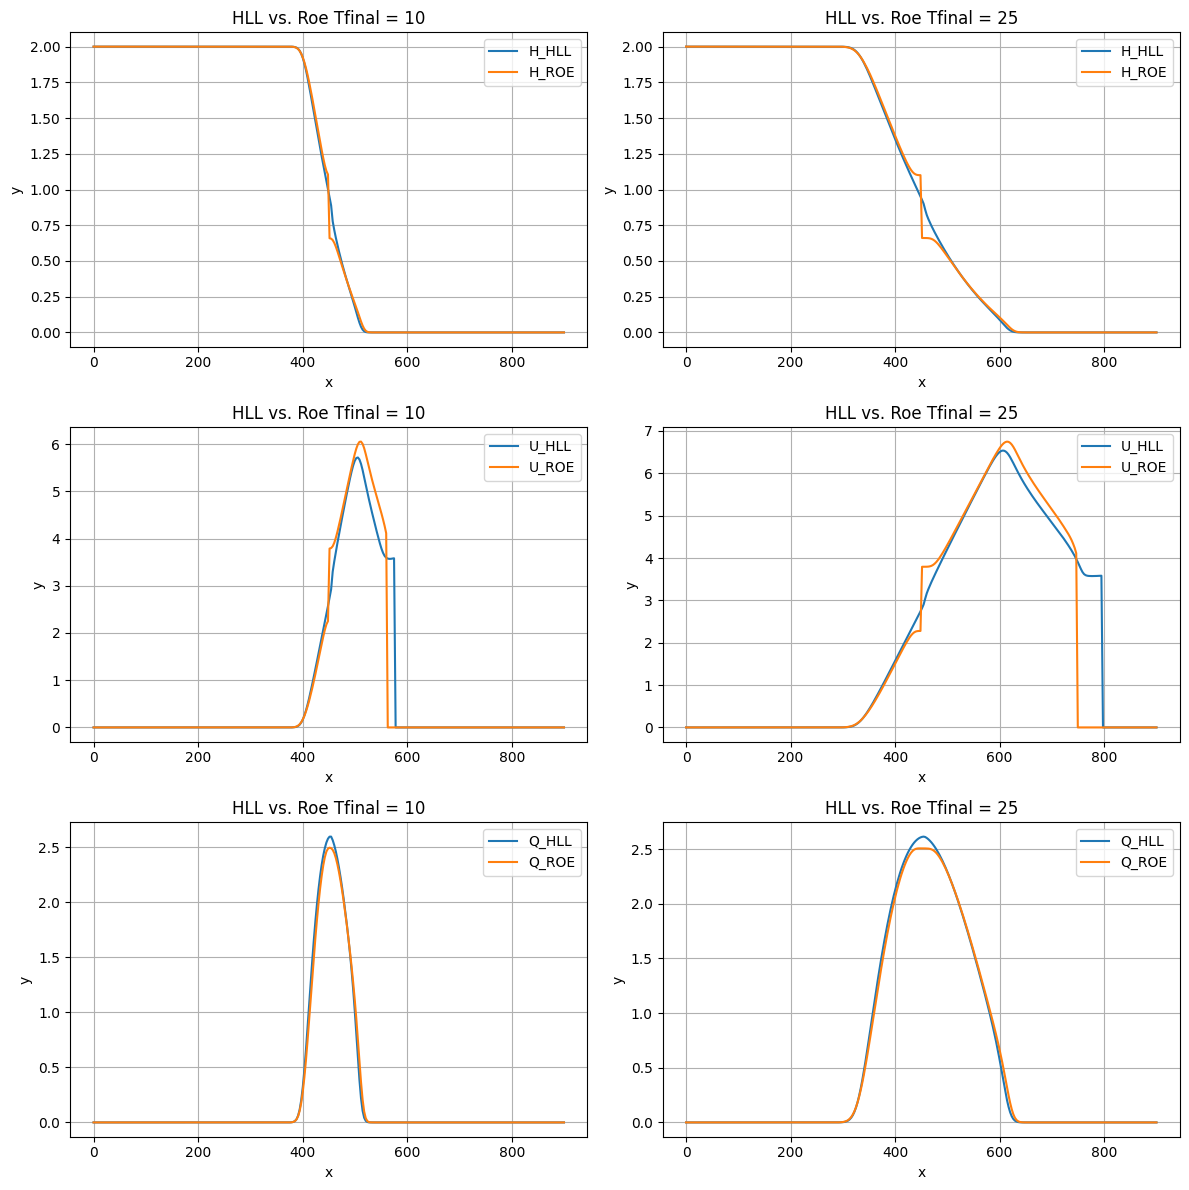

In [93]:
import matplotlib.pyplot as plt

def plot_curve(ax, x, curves, title, label1, label2):
    ax.plot(x, curves[0], label=label1)
    ax.plot(x, curves[1], label=label2)
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid()
    ax.legend()

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Exemple de données (à remplacer par vos simulations)
Tfinals = [10, 25]
h_HLL, u_HLL, q_HLL, x = simulate_convection_HLL(Tfinal=Tfinals[0])
h_ROE, u_ROE, q_ROE, x = simulate_convection_with_ROE(Tfinal=Tfinals[0])

# Colonne 1
plot_curve(axs[0, 0], x, [h_HLL, h_ROE], 'HLL vs. Roe Tfinal = 10', label1='H_HLL', label2='H_ROE') # courbe des Hauteurs
plot_curve(axs[1, 0], x, [u_HLL, u_ROE], 'HLL vs. Roe Tfinal = 10', label1='U_HLL', label2='U_ROE')
plot_curve(axs[2, 0], x, [q_HLL, q_ROE], 'HLL vs. Roe Tfinal = 10', label1='Q_HLL', label2='Q_ROE') 

h_HLL, u_HLL, q_HLL, x = simulate_convection_HLL(Tfinal=Tfinals[1])
h_ROE, u_ROE, q_ROE, x = simulate_convection_with_ROE(Tfinal=Tfinals[1])

# Colonne 2
plot_curve(axs[0, 1], x, [h_HLL, h_ROE], 'HLL vs. Roe Tfinal = 25', label1='H_HLL', label2='H_ROE') # courbe des Hauteurs
plot_curve(axs[1, 1], x, [u_HLL, u_ROE], 'HLL vs. Roe Tfinal = 25',  label1='U_HLL', label2='U_ROE')
plot_curve(axs[2, 1], x, [q_HLL, q_ROE], 'HLL vs. Roe Tfinal = 25',  label1='Q_HLL', label2='Q_ROE')

# Ajuster l'espacement entre les subplots
plt.tight_layout()

# Afficher le subplot
plt.show()
